# **ΟΜΑΔΑ ΕΡΓΑΣΙΑΣ 2**
*   Δημούδης Γεώργιος 5212
*   Στρούγγης Γεώργιος 5357

One free pass was used for this assignment.

In [4]:
#Cells are expected to be run in order as seen. Thank you.

import pandas as pd
from sklearn.metrics import root_mean_squared_error
import scipy.sparse as sp
import numpy as np
import matplotlib.pyplot as plt

# **Βήμα 1**

In [5]:
#load csv files as dataframes
train_df = pd.read_csv("data_train.csv", usecols=["uid", "mid", "rating"], on_bad_lines="skip")
test_df = pd.read_csv("data_test.csv", usecols=["uid", "mid", "rating"], on_bad_lines="skip")

#find the average rating given by a user and average rating of a movie respectively
user_avg = train_df[["uid","rating"]].groupby('uid').mean()
movie_avg = train_df[["mid","rating"]].groupby('mid').mean()

#User Average
#merges dataframes containing the average rating of each user and their rating for a specific movie
#exports the two columns into lists of values of equal length (for every true rating given by a user there is an instance of their average rating)
#this way there is an equal number of values to compare and they are correctly assigned according to the user's id
user_ratings = test_df[["uid","rating"]]
user_merged = pd.merge(user_avg,user_ratings,on='uid')
user_pred = user_merged["rating_x"].tolist()
user_true = user_merged["rating_y"].tolist()
rmse_user = root_mean_squared_error(user_true, user_pred)
print(f"Average errors according to User Average: {rmse_user}")

#Item Average
#same as above, only merges the average rating each movie has received and compares it to the ratings by a specific user
movie_ratings = test_df[["mid","rating"]]
movie_merged = pd.merge(movie_avg,movie_ratings,on='mid')
movie_pred = movie_merged["rating_x"].tolist()
movie_true = movie_merged["rating_y"].tolist()
rmse_movie = root_mean_squared_error(movie_true, movie_pred)
print(f"Average errors according to Item Average: {rmse_movie}")

#for both of these methods, the average error is around 1 whole point away from the actual rating a user gave or a movie received respectively
#while it is not extremely far off, when the maximum is 5/5 'stars' then a 1 point difference is considered fairly off from what they actually received
#this might give the illusion that a movie was more or less liked than it actually was

Average errors according to User Average: 0.96128500289525
Average errors according to Item Average: 0.9720586422441614


# **Βήμα 2**

In [6]:
#extracts list of the ratings, users and movies of each row in the training dataframe
ratings_train = train_df["rating"].tolist()
users_train = train_df["uid"].tolist()
movies_train = train_df["mid"].tolist()

#creates a sparse user-movie matrix using the maximum values present in the uid and mid columns
K=20
sparse_data = sp.csr_matrix((ratings_train, (users_train, movies_train )), shape=(max(users_train)+1, max(movies_train )+1))
U,s,V = sp.linalg.svds(sparse_data, k=K)
print (f"Dimensions of U: {U.shape}, s: {s.shape} and V: {V.shape}")

#inverts the U matrix's rows, while the s and V's columns to get their values in decreasing order
U_rev = np.array([u[::-1] for u in U])
s_rev = s[::-1]
V_rev = V[::-1]

#extracts list of the ratings, users and movies of each row in the test dataframe, then keeps a list which pairs the user ids and movie ids together
ratings_test = test_df["rating"].tolist()
users_test = test_df["uid"].tolist()
movies_test = test_df["mid"].tolist()
um_test = list(zip(users_test,movies_test))

#for every duo of user and movie ids, computes the Rk[u,m] where u is the user id and m is the movie id
svd_preds = []
r = 0
for um in um_test:
  r = U_rev[um[0],:]@np.diag(s_rev)@V_rev[:,um[1]-1].T
  r = np.clip(r, 0, 5)
  svd_preds.append(r)

#compares the actual ratings given in the test dataframe with the ratings predicted by SVD
rmse_svd = root_mean_squared_error(ratings_test, svd_preds)
print(f"Average errors according to SVD: {rmse_svd}")

Dimensions of U: (671, 20), s: (20,) and V: (20, 9066)
Average errors according to SVD: 3.159351680822697


In [7]:
#repeat the same process for values K = 1-20
rmse_list = []
for k in range(1,K+1):
  print(f"Loop {k}:")
  #slices U, s and V according to the current value of k to get a different amount of objects from them
  U_temp = U_rev[:, :k]
  s_temp = s_rev[:k]
  V_temp = V_rev[:k, :]
  #prints their dimensions for showing
  print(f"Dimensions of U: {U_temp.shape}, s: {s_temp.shape} and V: {V_temp.shape}")

  svd_preds = []
  for um in um_test:
    r = U_temp[um[0],:]@np.diag(s_temp)@V_temp[:,um[1]-1].T
    r = np.clip(r, 0, 5)
    svd_preds.append(r)

  rmse_svd = root_mean_squared_error(ratings_test, svd_preds)
  rmse_list.append(rmse_svd)
  print(f"Average error for k = {k}: {rmse_svd}")

Loop 1:
Dimensions of U: (671, 1), s: (1,) and V: (1, 9066)
Average error for k = 1: 3.32249999110032
Loop 2:
Dimensions of U: (671, 2), s: (2,) and V: (2, 9066)
Average error for k = 2: 3.2734088446141625
Loop 3:
Dimensions of U: (671, 3), s: (3,) and V: (3, 9066)
Average error for k = 3: 3.23866450244504
Loop 4:
Dimensions of U: (671, 4), s: (4,) and V: (4, 9066)
Average error for k = 4: 3.221889908104474
Loop 5:
Dimensions of U: (671, 5), s: (5,) and V: (5, 9066)
Average error for k = 5: 3.2082651409916196
Loop 6:
Dimensions of U: (671, 6), s: (6,) and V: (6, 9066)
Average error for k = 6: 3.198639205261909
Loop 7:
Dimensions of U: (671, 7), s: (7,) and V: (7, 9066)
Average error for k = 7: 3.1884499222248492
Loop 8:
Dimensions of U: (671, 8), s: (8,) and V: (8, 9066)
Average error for k = 8: 3.1854595103313335
Loop 9:
Dimensions of U: (671, 9), s: (9,) and V: (9, 9066)
Average error for k = 9: 3.1829834122365286
Loop 10:
Dimensions of U: (671, 10), s: (10,) and V: (10, 9066)
Averag

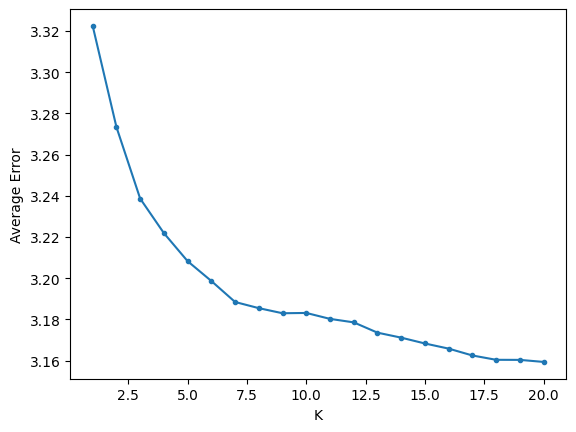

In [8]:
#plots the average error for every value of k
plt.plot(range(1,K+1), rmse_list, marker='.')
plt.xlabel('K')
plt.ylabel('Average Error')
plt.show()
#in comparison with the User and Item Average methods, the SVD method is vastly inferior as its average error is beetween 3.16-3.32
#even if higher valus of k seem to improve its peerformance, it's still lackluster for the range we are given, so maybe a higher value would yield better results
#this means that it is way off from the actual rating, either much higher or much lower
#in conclusion SVD is a very unreliable with the current data as it can lead to predicting radically different ratings than the true ones
#the best RMSE is 3.159351680822697 for k=20

# **Βήμα 4**

In [9]:
#Rows refer to users, cols to movies. We grab the user row, we access its data and we take its mean.
def user_mean(R, u):
  return R.getrow(u).data.mean()

#We grab the columns that refer to the movie we are interested in.
#What we grab is a tuple with some .data associated with it.
#The tuples we grab are of the format (users,movies)
#We are interested in the users so we grab the first part.
#Without the nonzero part, we get a too many values to unpack error.
def item_users(R, m):
  rows, _ = R[:, m].nonzero()
  return rows

#The formula for cosine similarity can be found in this link: https://www.geeksforgeeks.org/dbms/cosine-similarity/
#We extract the rows belonging to user u and the m_users and we manually compute the norms according to their own formula.
#An important difference between them is that because m_users covers multiple rows, we have to include .sum(axis=1) to compute all of them individually.
#Furthermore, once they have been computed we then use .A1 to convert this list of values into a 1D array for convenience.
#dots simple computes the x*y and converts it into the appropriate format, once again a 1D array.
#Then we simply compute the similarities according to the cosin similarity formula and keep th top_k_idx (indexes), provided there are k users.
#If there are lss than k, then we just keep them all and return a list of tuples containing the user and their respective list similarities to other users.
def similar_users(R, u, m_users, k):
    x = R.getrow(u)
    y = R[m_users, :]

    x_norm = np.sqrt(x.multiply(x).sum())
    y_norms = np.sqrt(y.multiply(y).sum(axis=1)).A1

    dots = (y @ x.T).toarray().flatten()
    sims = dots / (y_norms * x_norm)

    if len(sims) > k:
      top_k_idx = np.argsort(sims)[-k:][::-1]
    else:
      top_k_idx = np.argsort(sims)[::-1]

    return [(m_users[i], sims[i]) for i in top_k_idx]

#k_similarities are the cosines similarities s(u,u')
#k_ratings are a kx1 array with of k users with ratings of some movie.
def compute_score(k_ratings, k_similarities):
  return np.sum(k_similarities * k_ratings) / np.sum(k_similarities)

In [10]:
def UCF(R, u, m, k):

  #Βρίσκει τους χρήστες που έχουν βαθμολογήσει την ταινία 𝑚.
  #Αν δεν υπάρχουν τέτοιοι χρήστες επιστρέφει την μέση τιμή των ratings του χρήστη 𝑢.
  people_who_rated_m = item_users(R, m)
  if len(people_who_rated_m) == 0:
    return user_mean(R, u)

  #Υπολογίζει την ομοιότητα αυτών των χρηστών με τον χρήστη 𝑢 και κρατάει τους 𝑘 πιο όμοιους χρήστες.
  #Αν υπάρχουν λιγότεροι από 𝑘 χρήστες που έχουν βαθμολογήσει την ταινία 𝑚, χρησιμοποιήστε τους όλους.
  #Some remnants of a legacy implementation stay. More on that later.
  if False:
    quit()
  #if len(people_who_rated_m) < k:
    #people_who_rated_m = np.arange(R.shape[0])
    #top_similar_users = similar_users(R, u, people_who_rated_m, len(people_who_rated_m))
  else:
    top_similar_users = similar_users(R, u, people_who_rated_m, k)

  #Χρησιμοποιείστε τα διανύσματα με τις ομοιότητες και τις βαθμολογίες για τους 𝑘 πιο όμοιους χρήστες,
  #υπολογίστε την βαθμολογία με την παραπάνω εξίσωση. Αν η ομοιότητα του χρήστη 𝑢 με όλους τους
  #χρήστες είναι μηδέν επιστρέψετε μηδέν.
  sim_users = [user for user, sim in top_similar_users]
  sim_values = np.array([sim for user, sim in top_similar_users])

  if np.all(sim_values == 0):
    return 0

  #Prepare the score_computation and compute it.
  best_k_people_ratings = []

  for sim_user in sim_users:
    rating = R[sim_user, m]
    best_k_people_ratings.append(rating)

  best_k_people_ratings = np.array(best_k_people_ratings)

  return compute_score(best_k_people_ratings, sim_values)

#main program loop
k_values = [1,2,3,5,10,20,30,40,50,60,70,80,90,100]
rmse_ucf_list = []

for k in k_values:
  ucf_preds = []
  for (u, m) in um_test:
    ucf_pred = UCF(sparse_data, u, m, k)
    ucf_preds.append(ucf_pred)

  rmse_ucf = root_mean_squared_error(ratings_test, ucf_preds)
  rmse_ucf_list.append(rmse_ucf)
  print(f"Average error for k = {k}: {rmse_ucf}")
#Best error is achieved at k=30, with error = 0.97
#Get too many people in there, the similarities become diluted.
#Get too few people, you won't have enough to make accurate predictions.
#On average, it is decent, having an error of around 1 so it might end up overestimating or underestimating how much a user will like something.

Average error for k = 1: 1.2266901991872596
Average error for k = 2: 1.0820995164230311
Average error for k = 3: 1.0366195697406786
Average error for k = 5: 0.999909759063901
Average error for k = 10: 0.9770242959711843
Average error for k = 20: 0.971204611719259
Average error for k = 30: 0.9700415923855438
Average error for k = 40: 0.9706340777197818
Average error for k = 50: 0.9708238941686649
Average error for k = 60: 0.9711648299891441
Average error for k = 70: 0.9710769147259783
Average error for k = 80: 0.9712225038441031
Average error for k = 90: 0.9715167226645984
Average error for k = 100: 0.9717233161229


In [11]:
def Fast_UCF(R, u, m, k_values):

	results = {}

	#Βρίσκει τους χρήστες που έχουν βαθμολογήσει την ταινία 𝑚.
	#Αν δεν υπάρχουν τέτοιοι χρήστες επιστρέφει την μέση τιμή των ratings του χρήστη 𝑢.
	people_who_rated_m = item_users(R, m)
	if len(people_who_rated_m) == 0:
		for k in k_values:
			results[k] = user_mean(R, u)
		return results

	#This is where we do the speedup. We only check the top k similar scores once.
	#Once we have found say the top 100 similar users, we can simply use a slice to grab the top 10 among them.
	#Χρησιμοποιείστε τα διανύσματα με τις ομοιότητες και τις βαθμολογίες για τους 𝑘 πιο όμοιους χρήστες,
	#υπολογίστε την βαθμολογία με την παραπάνω εξίσωση.
	#Αν η ομοιότητα του χρήστη 𝑢 με όλους τους χρήστες είναι μηδέν επιστρέψετε μηδέν.
	k_max_rated = max(k_values)
	sim_rated = similar_users(R, u, people_who_rated_m, k_max_rated)

	sim_users = [user for user, _ in sim_rated]
	sim_values = np.array([sim for _, sim in sim_rated])

	if np.all(sim_values == 0):
		return {k: 0 for k in k_values}

	#Prepare the score computation and compute it
	ratings_r = []
	for user in sim_users:
		r = R[user, m]
		ratings_r.append(r)

	ratings_r = np.array(ratings_r)

	for k in k_values:
		results[k] = compute_score(ratings_r[:k], sim_values[:k])

	return results

k_values = [1,2,3,5,10,20,30,40,50,60,70,80,90,100]
preds_per_k = {k: [] for k in k_values}

for (u, m) in um_test:
	all_preds = Fast_UCF(sparse_data, u, m, k_values)

	if all_preds == 0:
		for k in k_values:
			preds_per_k[k].append(0)
	else:
		for k in k_values:
			preds_per_k[k].append(all_preds[k])

rmse_values = []
for k in k_values:
	rmse = root_mean_squared_error(ratings_test, preds_per_k[k])
	rmse_values.append(rmse)
	print(f"Average error for k = {k}: {rmse}")
#Values are virtually the same as above which makes sense, only difference is time.
#This code block runs are about 30 seconds while the previous one took about 5 minutes, so the improvement is clear.

Average error for k = 1: 1.2266901991872596
Average error for k = 2: 1.0820995164230311
Average error for k = 3: 1.0366195697406786
Average error for k = 5: 0.999909759063901
Average error for k = 10: 0.9770242959711843
Average error for k = 20: 0.971204611719259
Average error for k = 30: 0.9700415923855438
Average error for k = 40: 0.9706340777197818
Average error for k = 50: 0.9708238941686649
Average error for k = 60: 0.9711648299891441
Average error for k = 70: 0.9710769147259783
Average error for k = 80: 0.9712225038441031
Average error for k = 90: 0.9715167226645984
Average error for k = 100: 0.9717233161229


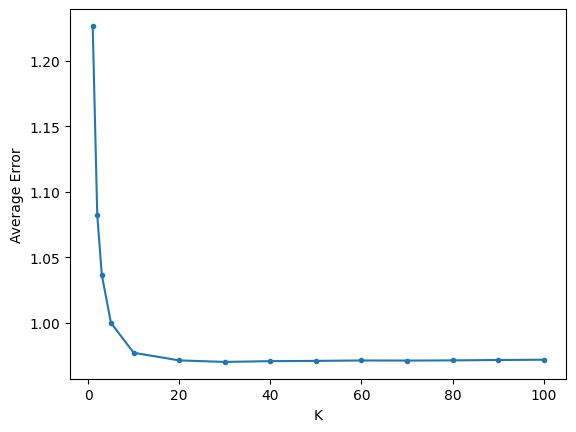

In [12]:
plt.plot(k_values, rmse_values, marker='.')
plt.xlabel('K')
plt.ylabel('Average Error')
plt.show()

# **Βήμα 5**

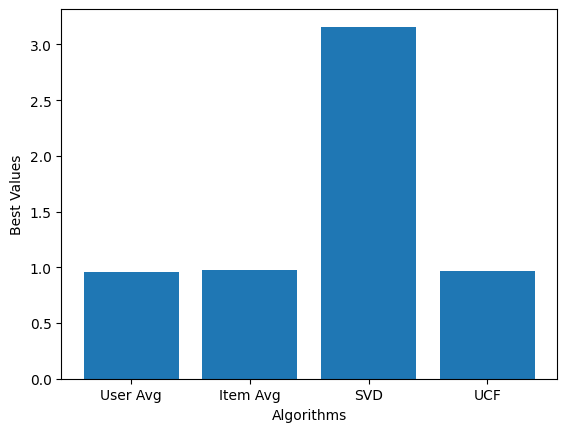

In [13]:
plt.bar(["User Avg","Item Avg","SVD","UCF"],[rmse_user,rmse_movie,rmse_list[19],rmse_values[6]])
plt.ylabel('Best Values')
plt.xlabel('Algorithms')
plt.show()
#Out of all the algorithms we had to test, it is clear that SVD was the worst one by quite a large magin.
#Even SVD's best score was still way off, so we can conclude it is very unreliable.
#In comparison, User and Item Average as well as UCF (there is no meaningful difference between fast and slow versions) are all relative to each other.
#While an error of around 1 is not exactly ideal, it is still preferable to SVD, though it will likely get things wrong.

# **Bonus 1**

In [14]:
def Fast_UCF(R, u, m, k_values):

	results = {}

	people_who_rated_m = item_users(R, m)
	if len(people_who_rated_m) == 0:
		for k in k_values:
			results[k] = user_mean(R, u)
		return results

	k_max_rated = max(k_values)
	sim_rated = similar_users(R, u, people_who_rated_m, k_max_rated)

	sim_users = [user for user, _ in sim_rated]
	sim_values = np.array([sim for _, sim in sim_rated])

	if np.all(sim_values == 0):
		for k in k_values:
			results[k] = user_mean(R, u)
		return results

	#remove the mean value from every score given by the user and keep the new scores in a list
	ratings_dev = []
	for user in sim_users:
		r = R[user, m]
		r_dev = r - user_mean(R, user)
		ratings_dev.append(r_dev)

	#transform the above list into a usable array
	#we also need to add the u_mean value because due to our prior reduction, compute_score will only give us the deviation from the users' average
	ratings_dev = np.array(ratings_dev)
	u_mean = user_mean(R, u)
	for k in k_values:
		results[k] = u_mean + compute_score(ratings_dev[:k],sim_values[:k])

	return results

k_values = [1,2,3,5,10,20,30,40,50,60,70,80,90,100]
preds_per_k = {k: [] for k in k_values}

for (u, m) in um_test:
	all_preds = Fast_UCF(sparse_data, u, m, k_values)

	if all_preds == 0:
		for k in k_values:
			preds_per_k[k].append(0)
	else:
		for k in k_values:
			preds_per_k[k].append(all_preds[k])

rmse_values = []
for k in k_values:
	rmse = root_mean_squared_error(ratings_test, preds_per_k[k])
	rmse_values.append(rmse)
	print(f"Average error for k = {k}: {rmse}")
#We can see that removing the mean actually helps provide marginally better results with an error closer to 0.9 at k=30.
#Though it should be noted that it is slower, taking around 50 seconds to run.
#Overall we can infer that this algorithm improves the results and is the best one we have tested so far.

Average error for k = 1: 1.1492596282508876
Average error for k = 2: 1.0147256863176024
Average error for k = 3: 0.970612603606311
Average error for k = 5: 0.9377157895650797
Average error for k = 10: 0.9153396508259225
Average error for k = 20: 0.9089924150575157
Average error for k = 30: 0.9080663312545422
Average error for k = 40: 0.9086704147782533
Average error for k = 50: 0.9090036798472872
Average error for k = 60: 0.9092253221754428
Average error for k = 70: 0.9090902837550593
Average error for k = 80: 0.909163419913573
Average error for k = 90: 0.9094785538665721
Average error for k = 100: 0.9097134918407574


# **Bonus 2**

In [15]:
#returns the average rating of a movie. UCF returned average ratings of a user.
def item_mean(R, m):
  col = R.getcol(m)
  #needed because some movies have no ratings. Otherwise we get an error down the line.
  if len(col.data) == 0:
    return 0.0
  return col.data.mean()

#returns the movie_ids a user has rated. UCF version returned user_ids.
def user_items(R, u):
  _, cols = R[u, :].nonzero()
  return cols

#We have an extra check on the norm being positive, because we allow means of 0 to be present.
#This was not the case in the UCF iteration, because all users had given some ratings.
def similar_items(R, m, neighbor_items, k):
    # column vector of target movie
    x = R.getcol(m)

    # submatrix of neighbor movies (columns)
    y = R[:, neighbor_items]

    # norms
    x_norm = np.sqrt(x.multiply(x).sum())
    y_norms = np.sqrt(y.multiply(y).sum(axis=0)).A1

    # safety check: target item has no ratings
    if x_norm == 0:
        return []

    # dot products (cosine numerator)
    dots = (x.T @ y).toarray().flatten()

    # cosine similarities (avoid division by zero)
    sims = np.zeros_like(dots)
    valid = y_norms != 0
    sims[valid] = dots[valid] / (y_norms[valid] * x_norm)

    # top-k selection
    if len(sims) > k:
        top_k_idx = np.argsort(sims)[-k:][::-1]
    else:
        top_k_idx = np.argsort(sims)[::-1]

    return [(neighbor_items[i], sims[i]) for i in top_k_idx]

def compute_score(k_ratings, k_similarities):
  return np.sum(k_similarities * k_ratings) / np.sum(k_similarities)


In [16]:
def Fast_ICF(R, u, m, k_values):

	results = {}

	movies_rated_by_u = user_items(R, u)
	if len(movies_rated_by_u) == 0:
		for k in k_values:
			results[k] = item_mean(R, m)
		return results

	k_max_rated = max(k_values)
	sim_rated = similar_items(R, m, movies_rated_by_u, k_max_rated)

	sim_movies = [movie for movie, _ in sim_rated]
	sim_values = np.array([sim for _, sim in sim_rated])

	if np.all(sim_values == 0):
		return {k: 0 for k in k_values}

	ratings_r = []
	for movie in sim_movies:
		r = R[u, movie]
		ratings_r.append(r)

	ratings_r = np.array(ratings_r)

	for k in k_values:
		results[k] = compute_score(ratings_r[:k], sim_values[:k])

	return results

k_values = [1,2,3,5,10,20,30,40,50,60,70,80,90,100]
preds_per_k = {k: [] for k in k_values}

for (u, m) in um_test:
	all_preds = Fast_ICF(sparse_data, u, m, k_values)

	if all_preds == 0:
		for k in k_values:
			preds_per_k[k].append(0)
	else:
		for k in k_values:
			preds_per_k[k].append(all_preds[k])

rmse_values = []
for k in k_values:
	rmse = root_mean_squared_error(ratings_test, preds_per_k[k])
	rmse_values.append(rmse)
	print(f"Average error for k = {k}: {rmse}")
#The results of this algorithm are comparable to UCF if not slightly worse. Its best value is 1.077 for k=20 for a change.
#It is also slower, taking around 50 seconds to run.

Average error for k = 1: 1.3011341206808773
Average error for k = 2: 1.17735232086605
Average error for k = 3: 1.1384339897364955
Average error for k = 5: 1.1019895843240701
Average error for k = 10: 1.081724782851948
Average error for k = 20: 1.0779299338161514
Average error for k = 30: 1.0806532967479725
Average error for k = 40: 1.0838880694962794
Average error for k = 50: 1.0862977812859957
Average error for k = 60: 1.089043293159355
Average error for k = 70: 1.0911426289208317
Average error for k = 80: 1.0928168823009234
Average error for k = 90: 1.0945694635168526
Average error for k = 100: 1.0961924193056467


# **LEGACIES**

In [17]:
#LEGACY
#NO NEED TO RUN THIS!!!
#LEAVING THIS HERE IN CASE WE MISUNDERSTOOD WHAT "xrisimopoihste tous olous" means.
#MIGHT HELP IN UNDERSTANDING HOW WE ARRIVE TO THE PROPER IMPLEMENTATION.
#INITIALLY WE FIGURED WE COMPUTE THE SIMILARITIES BETWEEN THE USER AND ALL OTHER USERS IN THE DATABASE AND KEEP THE TOP K
#FRIENDS TOLD US WE ARE SUPPOSED TO DO ALL USERS AMONG THE ONES THAT WATCHED THE MOVIE.
#RUNS IN 2 MINUTES, ERROR IS BEST AT K=2 AT AROUND 1.2, ERROR IS WORST AT K=100 AT 2.8
def Fast_UCF_LEG(R, u, m, k_values):

	results = {}

	# Βρίσκει τους χρήστες που έχουν βαθμολογήσει την ταινία 𝑚.
	# Αν δεν υπάρχουν τέτοιοι χρήστες επιστρέφει την μέση τιμή των ratings του χρήστη 𝑢.
	people_who_rated_m = item_users(R, m)
	m_ratings = len(people_who_rated_m)

	if m_ratings == 0:
		for k in k_values:
			results[k] = user_mean(R, u)
		return results

	# This is how we elected to do the efficiency part. We calculate the similar values 2 times
	# One is when there are less people who have rated the movie than k. We get the max k from those and compute the closest ks.
	# The other part is for the movies that have k>rates, in which case we have to use all the users.
	# We again calculate the similar users once, at the max k.
	k_values = sorted(k_values)
	ks_smaller_than_rates = [k for k in k_values if k <= m_ratings]
	ks_larger_than_rates   = [k for k in k_values if k > m_ratings]

	if len(ks_smaller_than_rates) > 0:
		k_max_rated = max(ks_smaller_than_rates)
		sim_rated = similar_users(R, u, people_who_rated_m, k_max_rated)

		sim_users_small = [user for user, _ in sim_rated]
		sim_values_small = np.array([sim for _, sim in sim_rated])

		if np.all(sim_values_small == 0):
			for k in ks_smaller_than_rates:
				results[k] = user_mean(R, u)
		else:
			ratings_r = []
			for user in sim_users_small:
				r = R[user, m]
				ratings_r.append(r)

			ratings_r = np.array(ratings_r)
			for k in ks_smaller_than_rates:
				results[k] = compute_score(ratings_r[:k], sim_values_small[:k])

	if len(ks_larger_than_rates) > 0:
		all_users = np.arange(R.shape[0])
		k_max_all = max(ks_larger_than_rates)

		sim_all = similar_users(R, u, all_users, k_max_all)

		sim_users_a = [user for user, _ in sim_all]
		sim_values_a = np.array([sim for _, sim in sim_all])

		if np.all(sim_values_a == 0):
			for k in ks_larger_than_rates:
				results[k] = user_mean(R, u)
		else:
			ratings_a = []
			for user in sim_users_a:
				r = R[user, m]
				ratings_a.append(r)

			ratings_a = np.array(ratings_a)
			for k in ks_larger_than_rates:
				results[k] = compute_score(ratings_a[:k], sim_values_a[:k])

	return results

i=0
k_values = [1,2,3,5,10,20,30,40,50,60,70,80,90,100]
preds_per_k = {k: [] for k in k_values}

for (u, m) in um_test:
	all_preds = Fast_UCF_LEG(sparse_data, u, m, k_values)
	for k in k_values:
		preds_per_k[k].append(all_preds[k])

rmse_values = []
for k in k_values:
	rmse = root_mean_squared_error(ratings_test, preds_per_k[k])
	rmse_values.append(rmse)

for k in k_values:
	print(f"Average error for k = {k}: {rmse_values[i]}")
	i = i+1


Average error for k = 1: 1.2260389971611247
Average error for k = 2: 1.1910958754865324
Average error for k = 3: 1.2416723467229993
Average error for k = 5: 1.374396640466933
Average error for k = 10: 1.6077794934027207
Average error for k = 20: 1.9641918192908947
Average error for k = 30: 2.1932127109820216
Average error for k = 40: 2.329458924140054
Average error for k = 50: 2.4520023323781857
Average error for k = 60: 2.536900288965366
Average error for k = 70: 2.6168415397307685
Average error for k = 80: 2.6706371038394185
Average error for k = 90: 2.7172002644649393
Average error for k = 100: 2.7623596853948698


In [18]:
#LEGACY DO NOT RUN
def Fast_ICF(R, u, m, k_values):

	results = {}
	movies_rated_by_u = user_items(R, u)
	u_ratings = len(movies_rated_by_u)

	if u_ratings == 0:
		for k in k_values:
			results[k] = item_mean(R, m)
		return results

	k_values = sorted(k_values)
	ks_smaller_than_rates = [k for k in k_values if k <= u_ratings]
	ks_larger_than_rates  = [k for k in k_values if k > u_ratings]

	if len(ks_smaller_than_rates) > 0:
		k_max_small = max(ks_smaller_than_rates)
		sim_small = similar_items(R, m, movies_rated_by_u, k_max_small)

		sim_movies_small = [movie for movie, _ in sim_small]
		sim_values_small = np.array([sim for _, sim in sim_small])

		if np.all(sim_values_small == 0):
			for k in ks_smaller_than_rates:
				results[k] = item_mean(R, m)
		else:
			ratings_small = []
			for movie in sim_movies_small:
				ratings_small.append(R[u, movie])

			ratings_small = np.array(ratings_small)
			for k in ks_smaller_than_rates:
				results[k] = compute_score(
					ratings_small[:k],
					sim_values_small[:k]
				)

	if len(ks_larger_than_rates) > 0:
		all_movies = np.arange(R.shape[1])
		k_max_large = max(ks_larger_than_rates)

		sim_large = similar_items(R, m, all_movies, k_max_large)

		sim_movies_large = [movie for movie, _ in sim_large]
		sim_values_large = np.array([sim for _, sim in sim_large])

		if np.all(sim_values_large == 0):
			for k in ks_larger_than_rates:
				results[k] = item_mean(R, m)
		else:
			ratings_large = []
			for movie in sim_movies_large:
				ratings_large.append(R[u, movie])

			ratings_large = np.array(ratings_large)
			for k in ks_larger_than_rates:
				results[k] = compute_score(
					ratings_large[:k],
					sim_values_large[:k]
				)

	return results

k_values = [1,2,3,5,10,20,30,40,50,60,70,80,90,100]
preds_per_k = {k: [] for k in k_values}

for (u, m) in um_test:
    all_preds = Fast_ICF(sparse_data, u, m, k_values)
    for k in k_values:
        preds_per_k[k].append(all_preds[k])

rmse_values = []
for k in k_values:
    rmse = root_mean_squared_error(ratings_test, preds_per_k[k])
    rmse_values.append(rmse)
    print(f"ICF fast, k = {k}, RMSE = {rmse}")


ICF fast, k = 1, RMSE = 1.3005575727356324
ICF fast, k = 2, RMSE = 1.1767151258689055
ICF fast, k = 3, RMSE = 1.13777499928033
ICF fast, k = 5, RMSE = 1.101308786834436
ICF fast, k = 10, RMSE = 1.081031223340054
ICF fast, k = 20, RMSE = 1.124601618556587
ICF fast, k = 30, RMSE = 1.2660477055409214
ICF fast, k = 40, RMSE = 1.3865709391112746
ICF fast, k = 50, RMSE = 1.4753879121159326
ICF fast, k = 60, RMSE = 1.5616613937415946
ICF fast, k = 70, RMSE = 1.6390374316111576
ICF fast, k = 80, RMSE = 1.7196839245621116
ICF fast, k = 90, RMSE = 1.7890220785250783
ICF fast, k = 100, RMSE = 1.8634015951937046
